In [1]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("dataset3.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [9]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

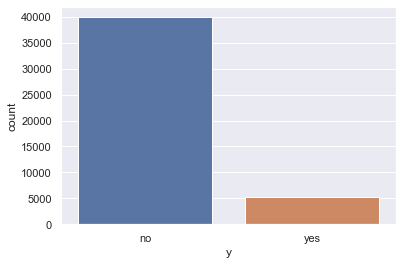

In [10]:
# making a count plot for Y column 
sns.set()
sns.countplot("y",data=data)

In [13]:
# checking no of parcentage yes and no
countyes=len(data[data.y=='yes'])
countno= len(data[data.y=='no'])
print(f'parcentage of yes=',countyes/len(data.y)*100)
print(f'parcentage of no=',countno/len(data.y)*100)

parcentage of yes= 11.698480458295547
parcentage of no= 88.30151954170445


In [14]:
# Replacing categorical columns 
data.replace({'y':{'no':0,'yes':1}},inplace=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

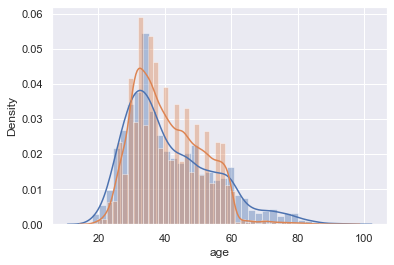

In [15]:
sns.distplot(data['age'][data['y']==1])
sns.distplot(data['age'][data['y']==0])

<AxesSubplot:xlabel='age', ylabel='count'>

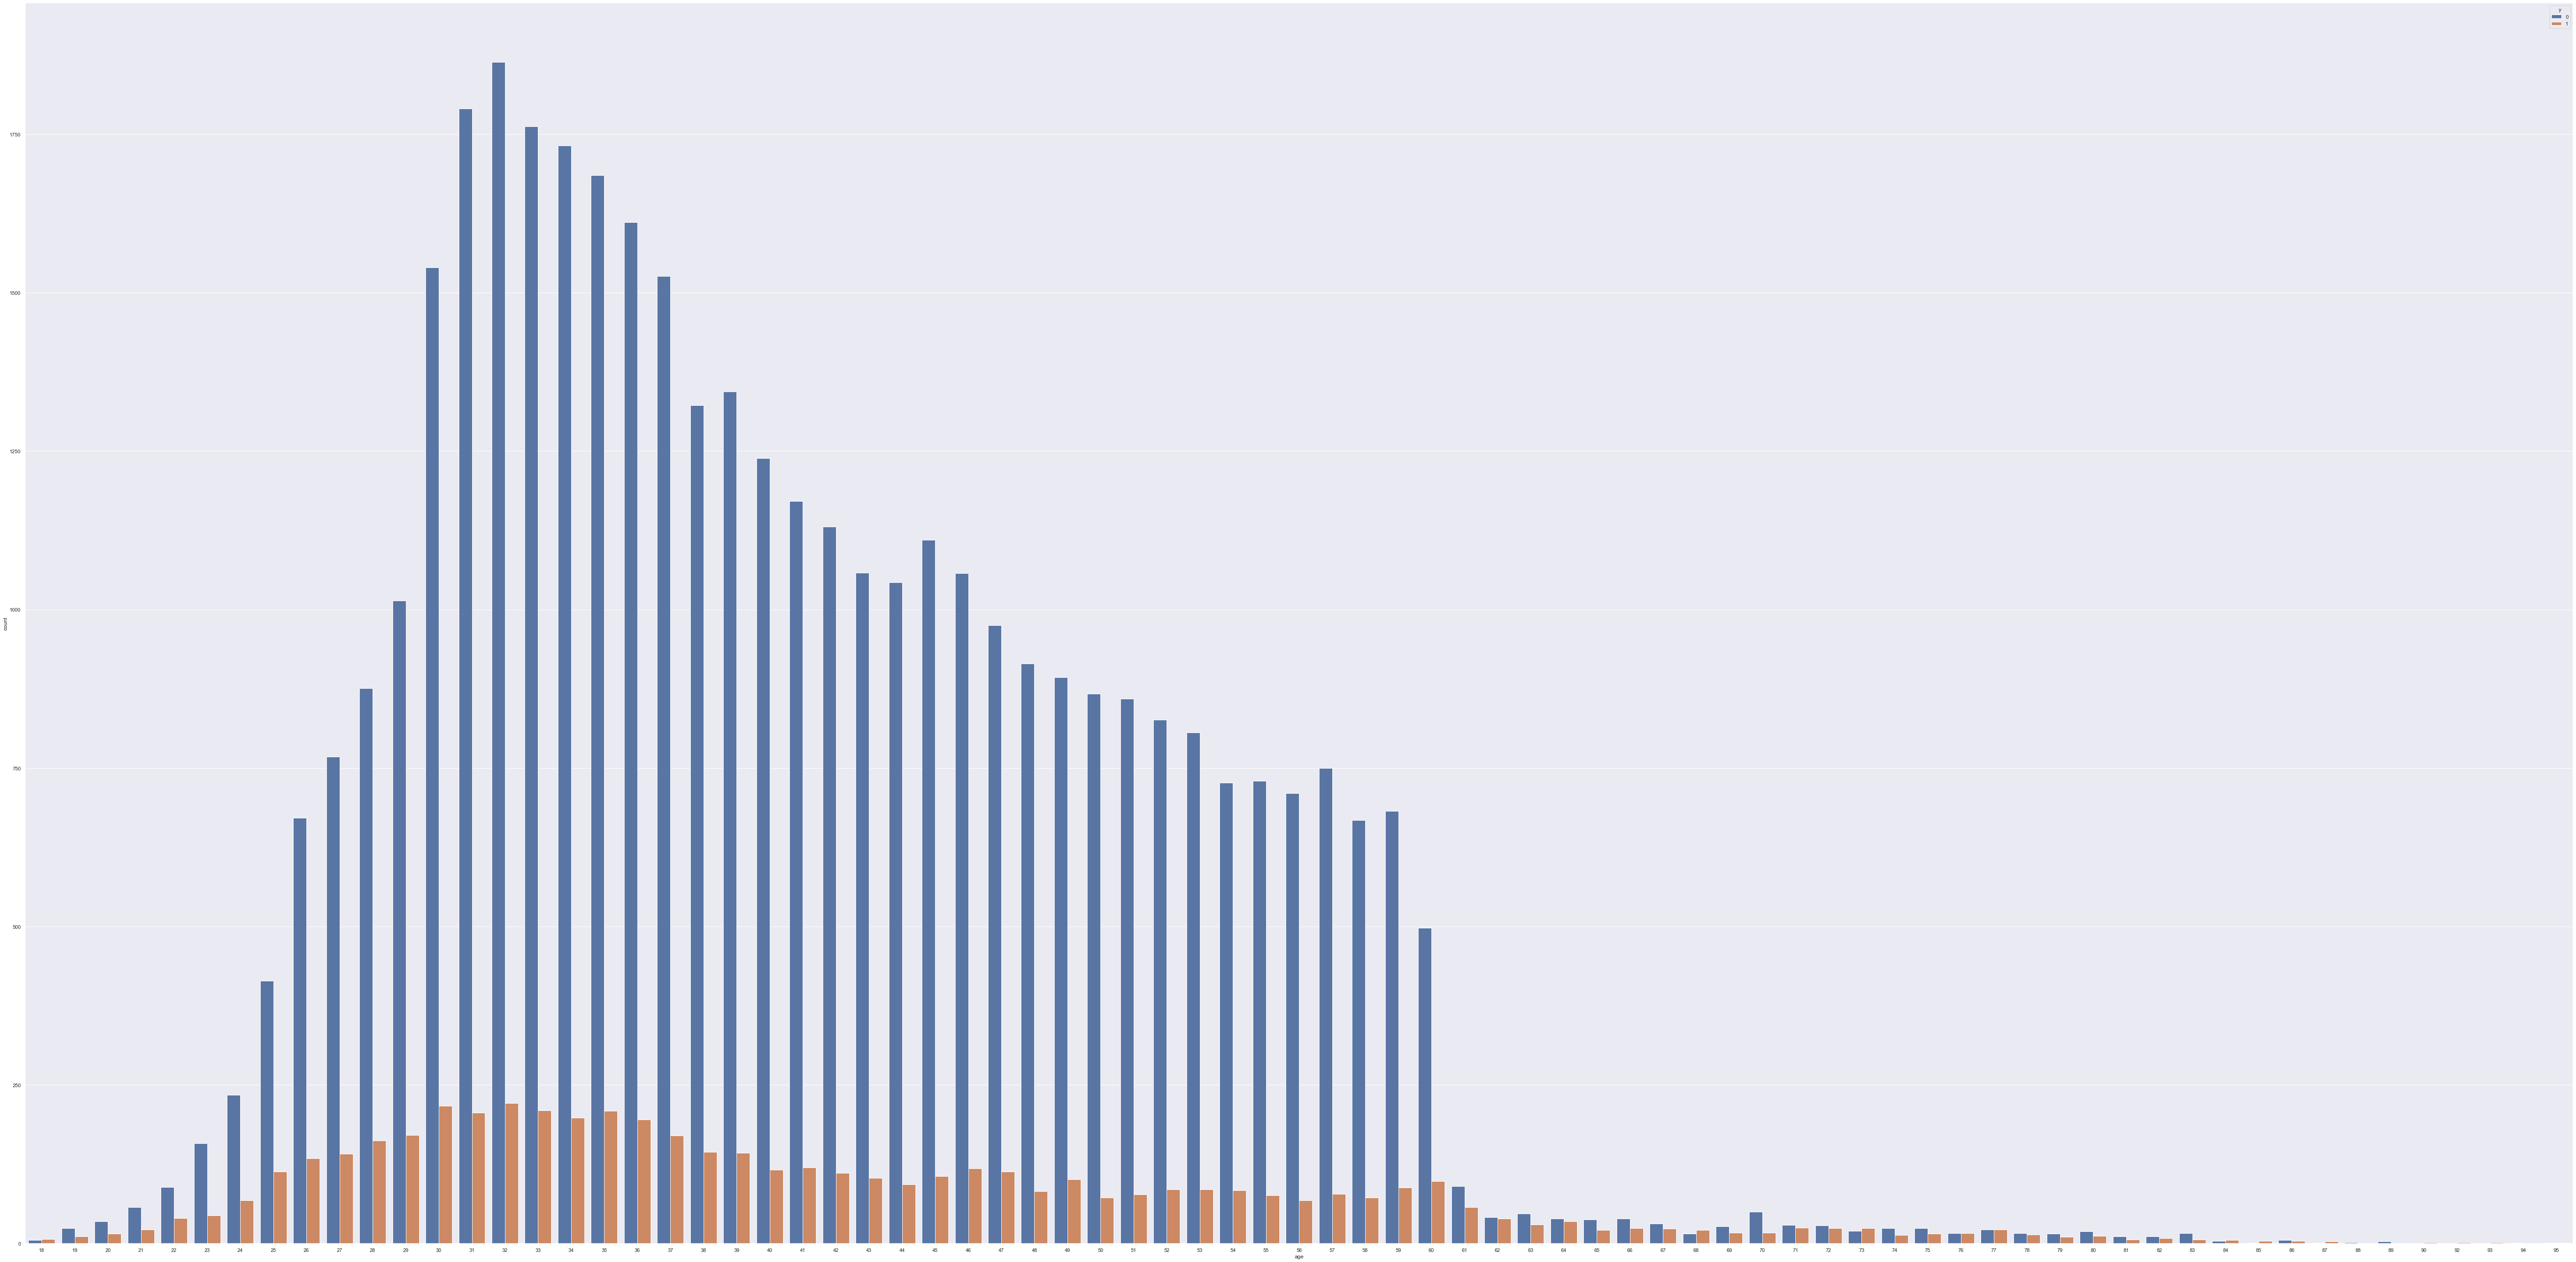

In [16]:
# no of y Age base
plt.figure(figsize=(100,50))
sns.countplot('age',hue='y',data=data)

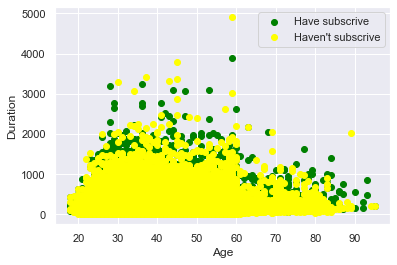

In [22]:
plt.scatter(x=data.age[data.y==1],y=data.duration[data.y==1],c='green')
plt.scatter(x=data.age[data.y==0],y=data.duration[data.y==0],c='yellow')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [23]:
# checking parcentage of people y in age
data.groupby(['age'])['y'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: y, Length: 77, dtype: float64

In [24]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

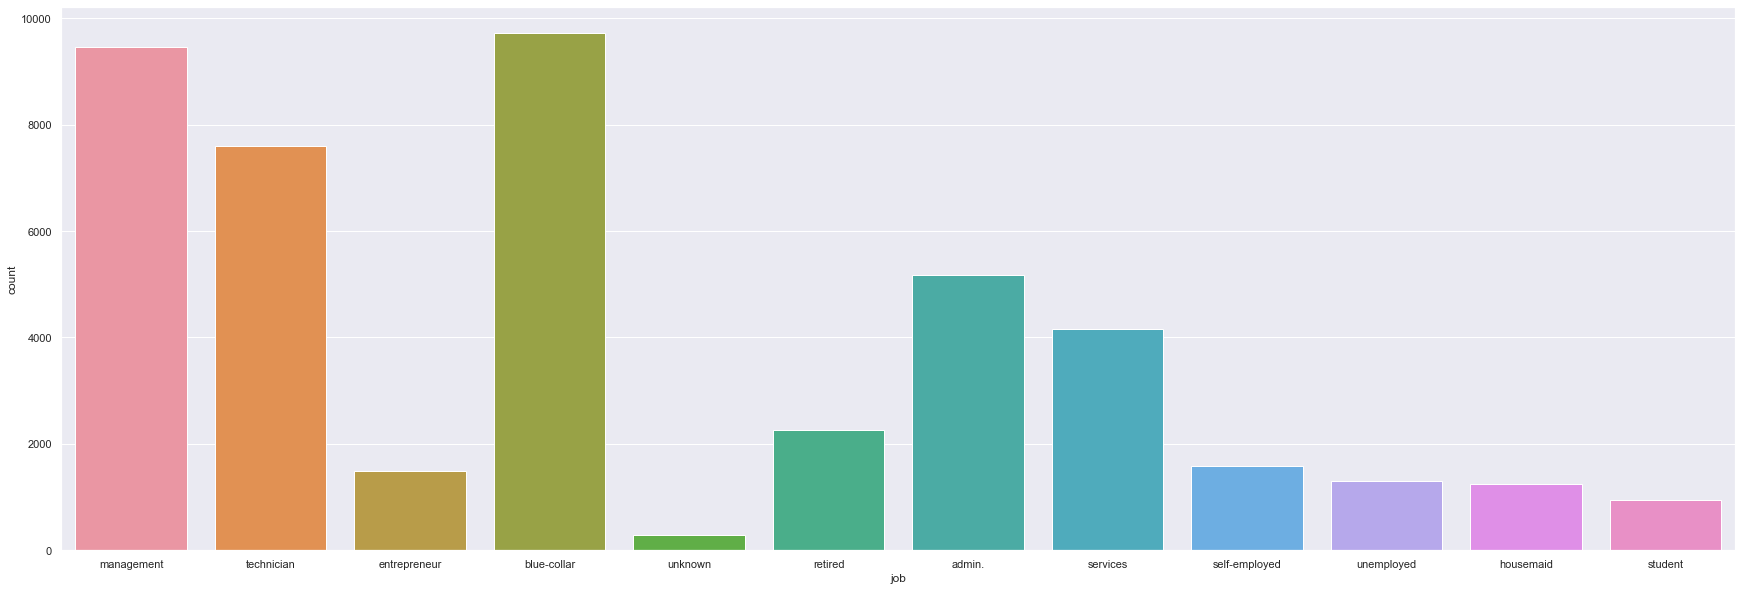

In [25]:
# making a count plot for job column 
plt.figure(figsize=(30,10))
sns.countplot("job",data=data)

<AxesSubplot:xlabel='job', ylabel='count'>

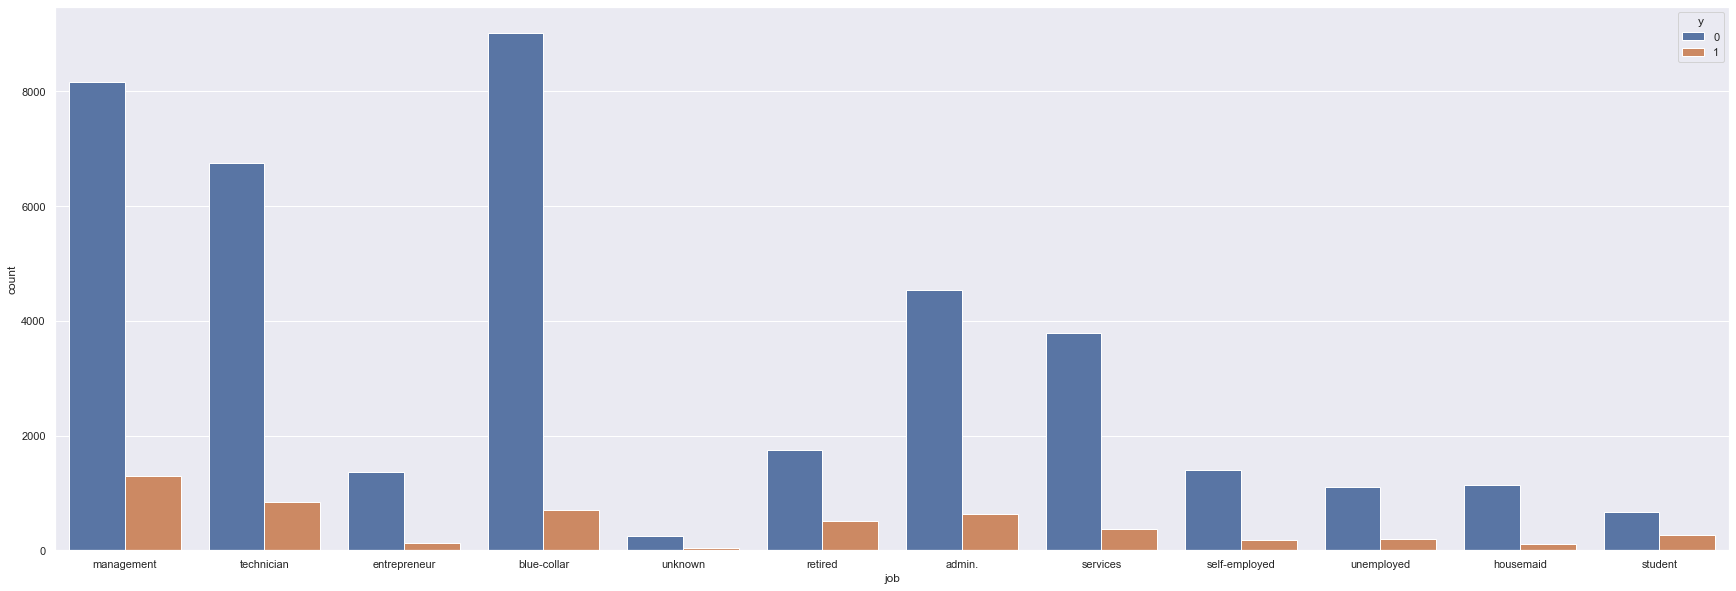

In [26]:
# no of y job base
plt.figure(figsize=(30,10))
sns.countplot('job',hue='y',data=data)

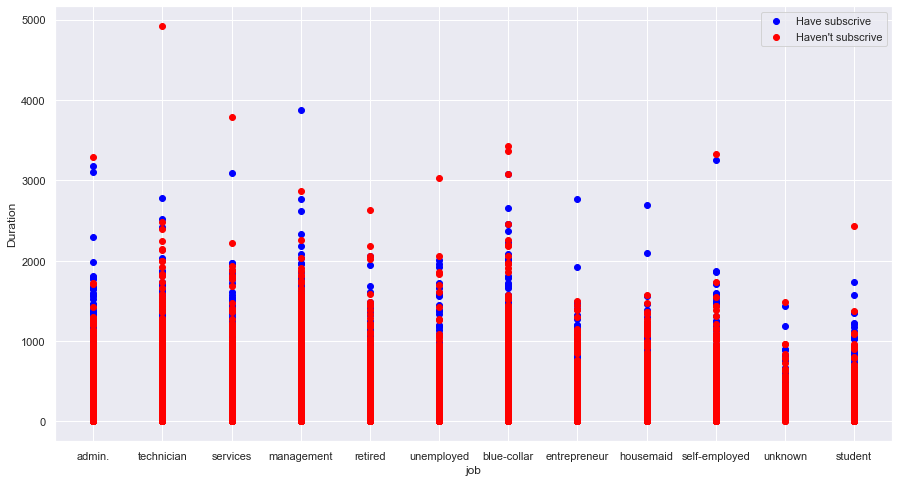

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(x=data.job[data.y==1],y=data.duration[data.y==1],c='blue')
plt.scatter(x=data.job[data.y==0],y=data.duration[data.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('job')
plt.ylabel('Duration')
plt.show()

In [29]:
# checking parcentage of people y in job
data.groupby(['job'])['y'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

<AxesSubplot:xlabel='marital', ylabel='count'>

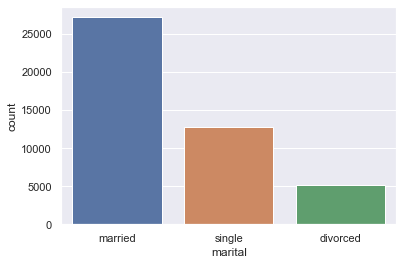

In [30]:
# making a count plot for marital column 
sns.countplot("marital",data=data)

<AxesSubplot:xlabel='marital', ylabel='count'>

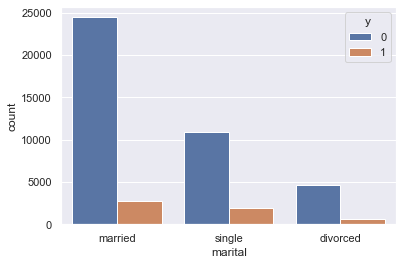

In [31]:
# no of y marital base
sns.countplot('marital',hue='y',data=data)

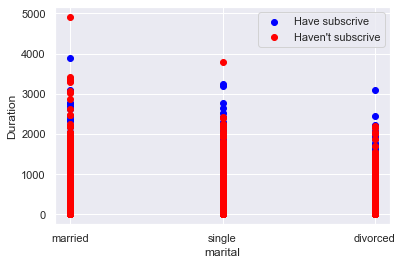

In [32]:
# plt.figure(figsize=(15,8))
plt.scatter(x=data.marital[data.y==1],y=data.duration[data.y==1],c='blue')
plt.scatter(x=data.marital[data.y==0],y=data.duration[data.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [34]:
# checking percentage of people y in marital
data.groupby(['marital'])['y'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: y, dtype: float64

In [36]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

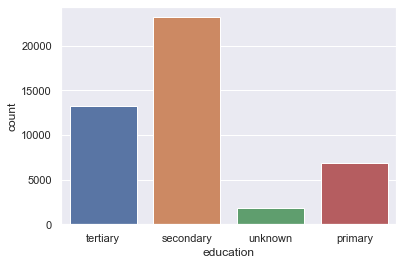

In [37]:
# making a count plot for Y column 
sns.countplot("education",data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

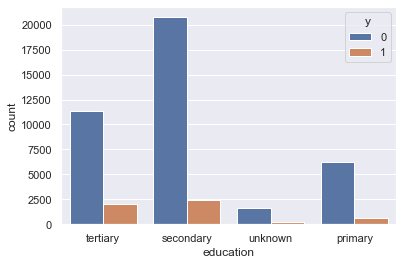

In [38]:
# no of y education base
sns.countplot('education',hue='y',data=data)

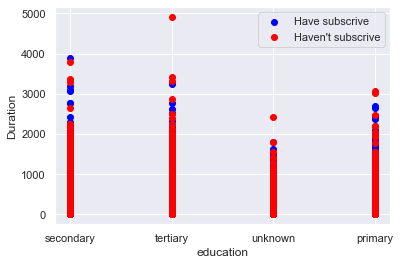

In [39]:
plt.scatter(x=data.education[data.y==1],y=data.duration[data.y==1],c='blue')
plt.scatter(x=data.education[data.y==0],y=data.duration[data.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('education')
plt.ylabel('Duration')
plt.show()

In [40]:
# checking percentage of people y in education
data.groupby(['education'])['y'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: y, dtype: float64

<AxesSubplot:xlabel='housing', ylabel='count'>

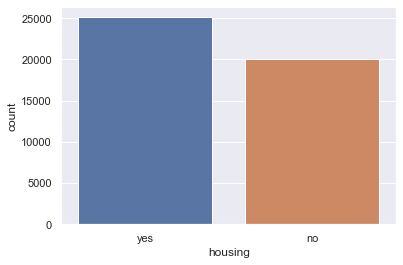

In [41]:
# making a count plot for housing column 
sns.countplot("housing",data=data)

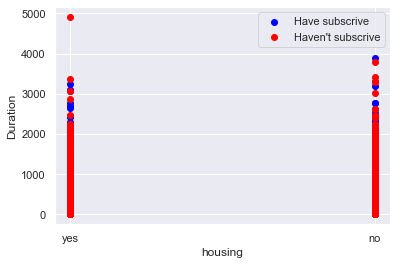

In [42]:
plt.scatter(x=data.housing[data.y==1],y=data.duration[data.y==1],c='blue')
plt.scatter(x=data.housing[data.y==0],y=data.duration[data.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [43]:
# checking percentage of people y in housing
data.groupby(['housing'])['y'].mean()

housing
no     0.167024
yes    0.077000
Name: y, dtype: float64

In [44]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='loan', ylabel='count'>

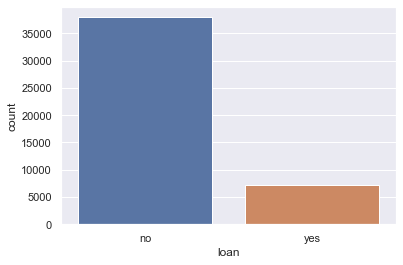

In [45]:
# making a count plot for loan column 
sns.countplot("loan",data=data)

<AxesSubplot:xlabel='loan', ylabel='count'>

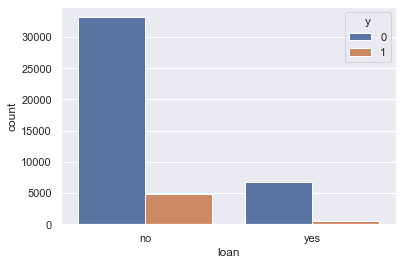

In [46]:
# no of y loan base
sns.countplot('loan',hue='y',data=data)

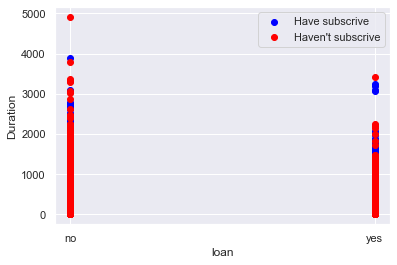

In [47]:
plt.scatter(x=data.loan[data.y==1],y=data.duration[data.y==1],c='blue')
plt.scatter(x=data.loan[data.y==0],y=data.duration[data.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()

In [48]:
# checking percentage of people y in loan
data.groupby(['loan'])['y'].mean()

loan
no     0.126557
yes    0.066814
Name: y, dtype: float64

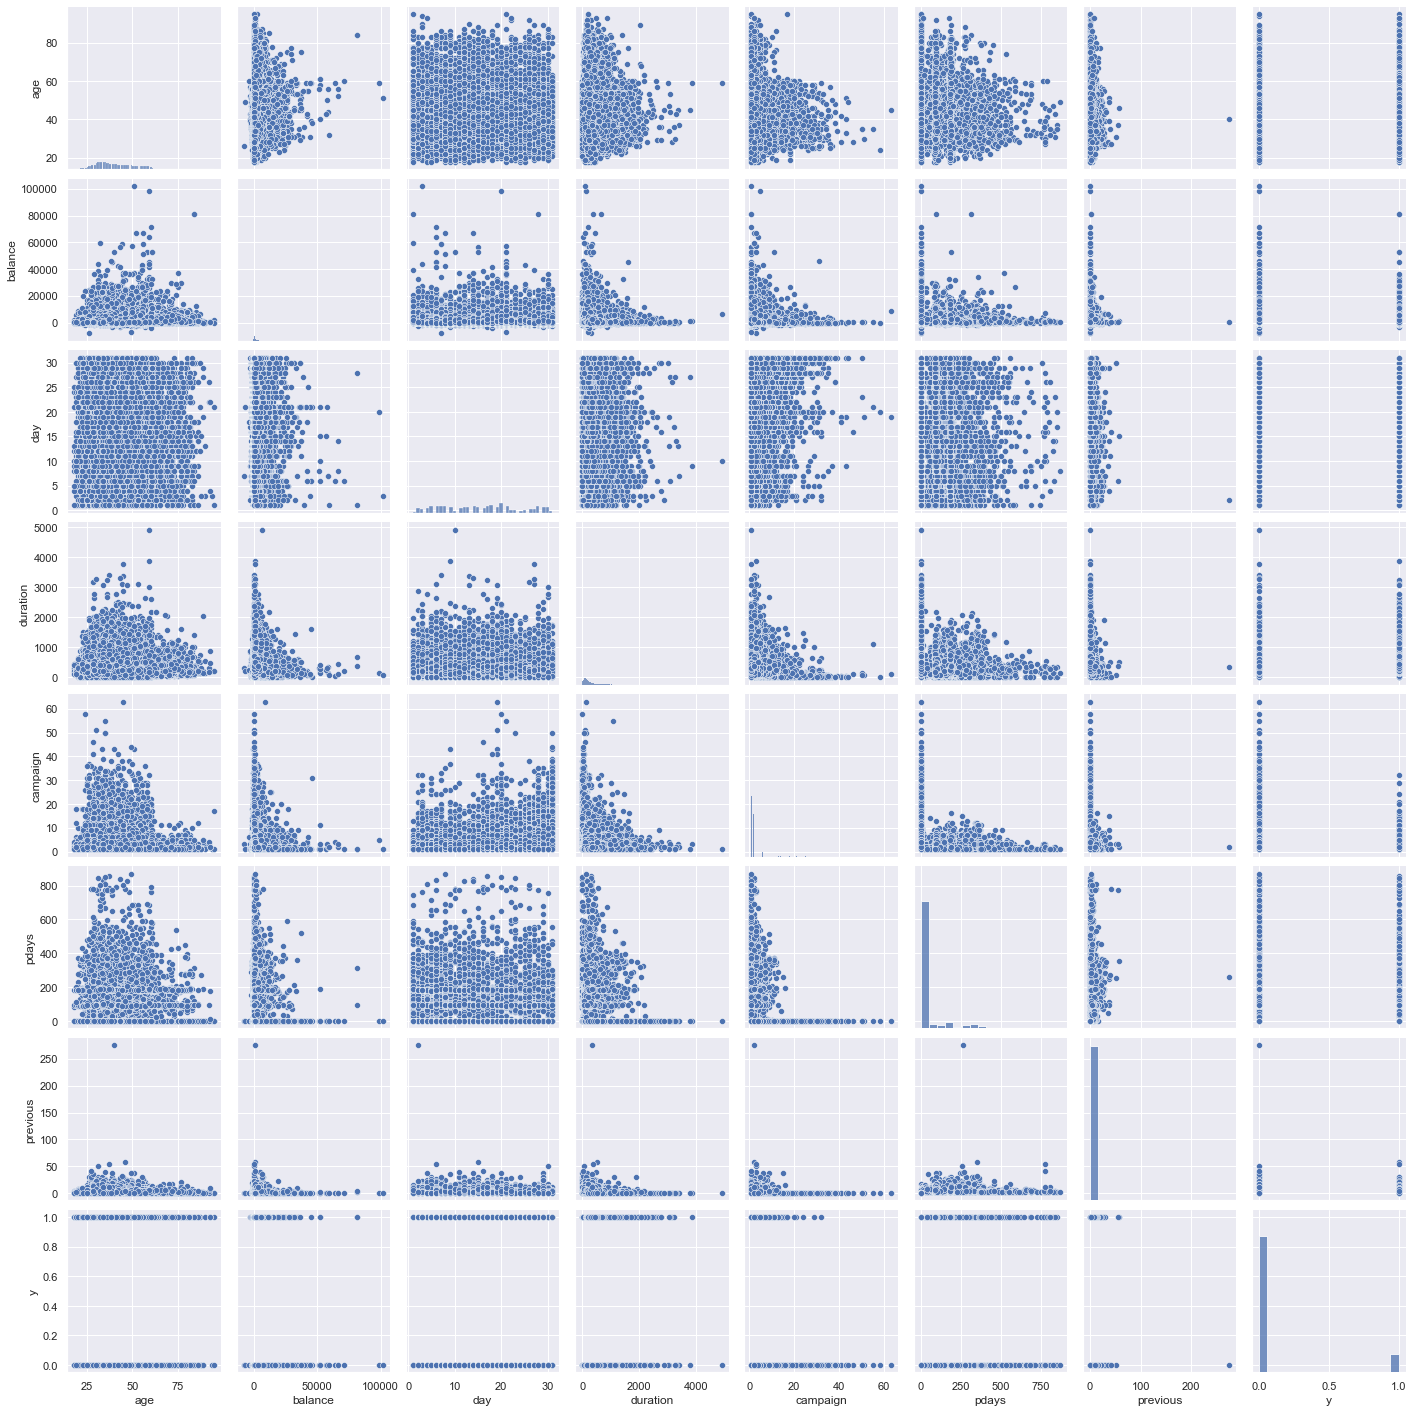

In [49]:
sns.pairplot(data=data)

<AxesSubplot:>

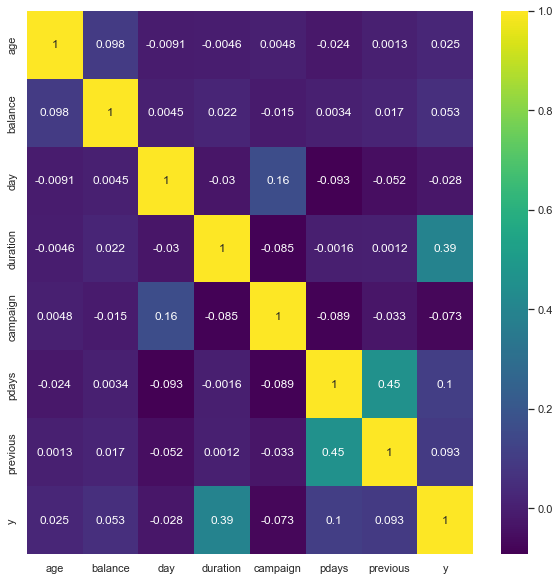

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),annot=True,cmap='viridis')

In [53]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [54]:
# Encoding categorical columns
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [55]:
# Encoding categorical columns
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [56]:
# Encoding categorical columns
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [57]:
# Encoding categorical columns
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [58]:
# Encoding categorical columns
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [59]:
# Replacing all categorical columns 
data.replace({'job':{ 'blue-collar' : 0,
                    'management'  : 1,    
                   'technician'   : 2,
                    'admin.'      : 3, 
                    'services'    : 4,
                    'retired'     : 5,
                    'self-employed':6,
                    'entrepreneur' :7,
                    'unemployed'   :8,
                    'housemaid'    :9,
                    'student'      :10,
                    'unknown'      :11, },
            'marital':{'married':0,'single':1,'divorced':2},
            'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},
            'default':{'no':0,'yes':1},
            'housing':{'no':0,'yes':1},
            'loan':{'no':0,'yes':1}
                      },inplace=True)

In [60]:
# Drop columns
data.drop(columns=['contact','day','month','poutcome'],inplace=True)

In [61]:
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
34694,45,1,0,1,0,0,1,0,469,2,342,1,0
44874,36,8,0,0,0,17458,0,0,390,2,-1,0,0
640,55,1,1,0,0,220,1,0,328,2,-1,0,0
21211,48,3,0,0,0,112,0,0,139,5,-1,0,0
40592,50,3,2,0,0,769,0,0,72,2,363,4,0


In [62]:
x=data.drop(columns=['y'])
y=data.y

In [63]:
x.shape

(45211, 12)

In [64]:
y.shape

(45211,)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Using LogisticRegression

In [66]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [67]:
Lr.score(x_test,y_test)

0.8889748977109366

In [68]:
train_score = Lr.score(x_train,y_train)
print(train_score)

test_score = Lr.score(x_test,y_test)
print(test_score)

0.8888796726387967
0.8889748977109366


In [69]:
print(classification_report(y_test,Lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.57      0.18      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [70]:
print(confusion_matrix(y_test,Lr.predict(x_test)))

[[7848  146]
 [ 858  191]]


# Using RandomForestClassifier

In [71]:
Rm = RandomForestClassifier() 
Rm.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
Rm.score(x_test,y_test)

0.8967156916952339

In [73]:
train_score = Rm.score(x_train,y_train)
print(train_score)

test_score = Rm.score(x_test,y_test)
print(test_score)

0.9999723512497235
0.8967156916952339


In [74]:
print(classification_report(y_test,Rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.59      0.35      0.44      1049

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [75]:
print(confusion_matrix(y_test,Rm.predict(x_test)))

[[7742  252]
 [ 682  367]]


# Using DecisionTreeClassifier

In [76]:
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred = Dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_pred = Dtc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7270  724]
 [ 621  428]]
**************************************************
Accuracy Score = 0.8512661727302886
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7994
           1       0.37      0.41      0.39      1049

    accuracy                           0.85      9043
   macro avg       0.65      0.66      0.65      9043
weighted avg       0.86      0.85      0.85      9043



In [79]:
# Training Data Evaluation 

y_pred = Dtc.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
**************************************************
Accuracy Score = 1.0
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



# Randomised Search

In [81]:
 DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [82]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [83]:
# Testing Data Evaluation 

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7994
           1       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [84]:
# Training Data Evaluation 

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31928
           1       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



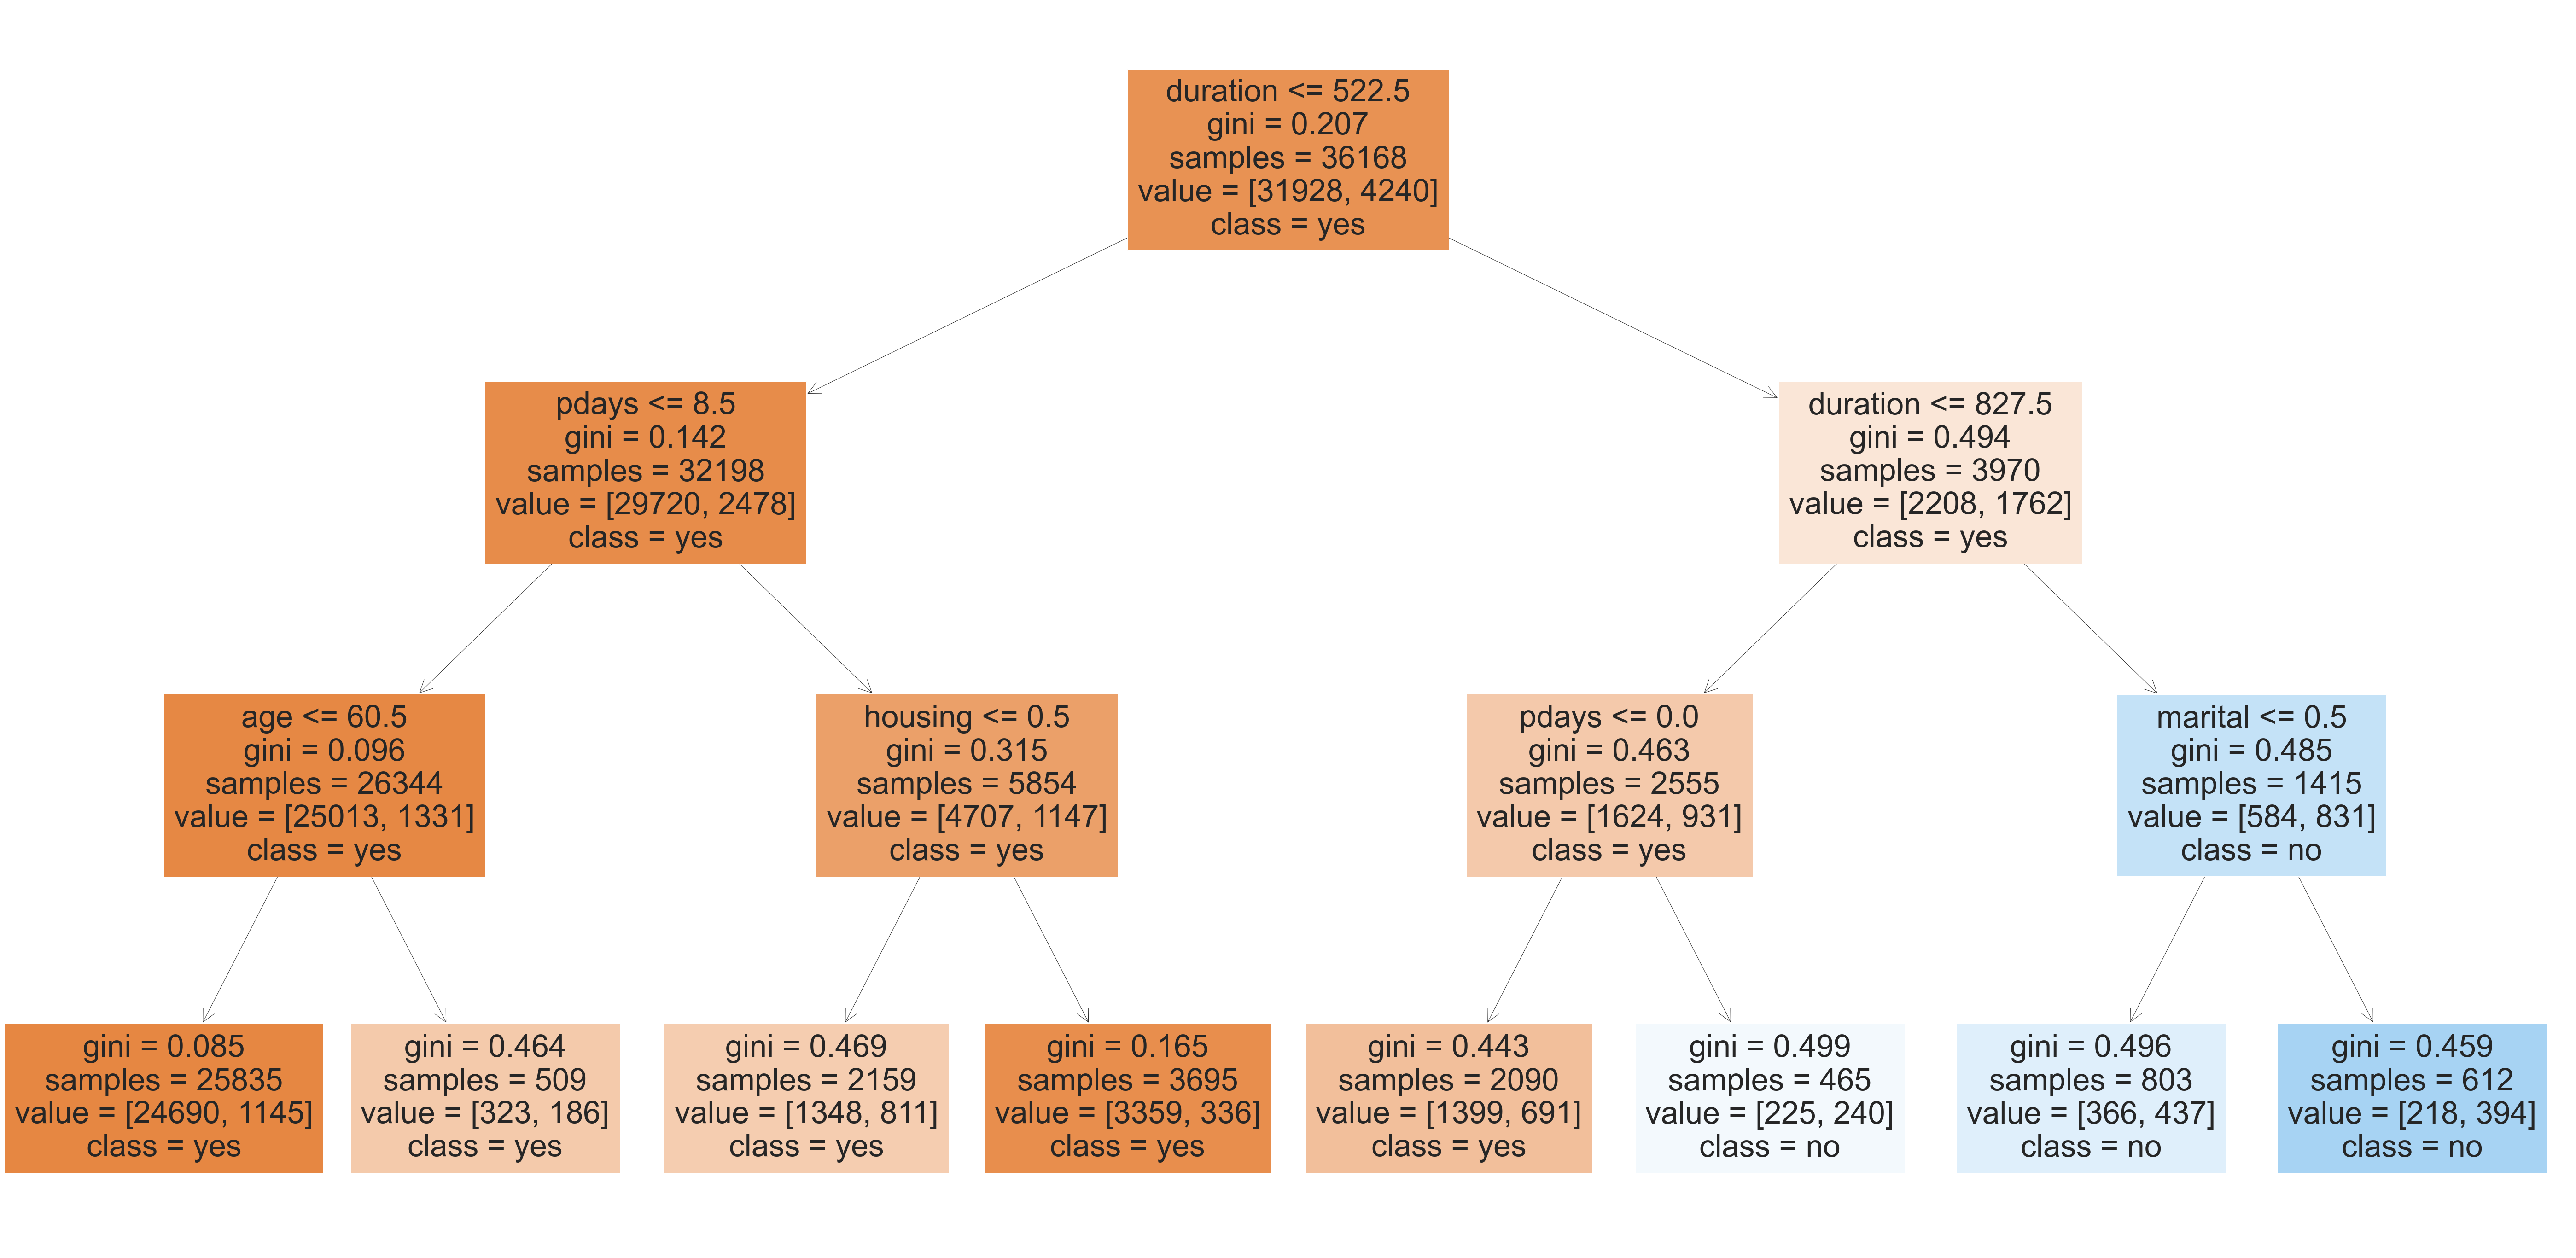

In [85]:
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])
plt.savefig("decision_tree2.png")